# MVN DATA & ANALYTICS TASKS 

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# abre el archivo en modo lectura binaria
with open(r"C:\Users\Ana\OneDrive\Escritorio\ARTORG\igraph\MVN1_corrected_SI.pkl", "rb") as f:
    data = pickle.load(f)

# Ver tipo de objeto
print(type(data))

print(data.summary())

C:\Users\Ana\AppData\Local\Temp\ipykernel_8708\91526609.py:7: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(f)


<class 'igraph.Graph'>
IGRAPH U--- 9168 12071 -- 
+ attr: border_vertices (v), boundaryType (v), boundaryValue (v), coords (v), index (v), pBC (v), pressure (v), connectivity (e), diameter (e), diameters (e), htt (e), length (e), lengths (e), lengths2 (e), nkind (e), points (e)


## 1) SINGLE CONNECTED COMPONENT

In [3]:

print(data.is_connected())

if data.is_connected():
    print("The graph is a single connected component")
else:
    print("The graph has more than one component")
    
components = data.components()  # returns a VertexClustering object
print("Number of connected components:", len(components))

# Useful for detecting isolated nodes or unconnected subsets 
for i, comp in enumerate(components):
    print(f"Component {i} has {len(comp)} nodes")


True
The graph is a single connected component
Number of connected components: 1
Component 0 has 9168 nodes


## 2) EDGES FOR EACH NKIND

Types of unique edges (option A): {0, 1, 2, 3, 4, 5}
Type of edge: 0, Count: 20
Type of edge: 1, Count: 54
Type of edge: 2, Count: 129
Type of edge: 3, Count: 232
Type of edge: 4, Count: 11635
Type of edge: 5, Count: 1


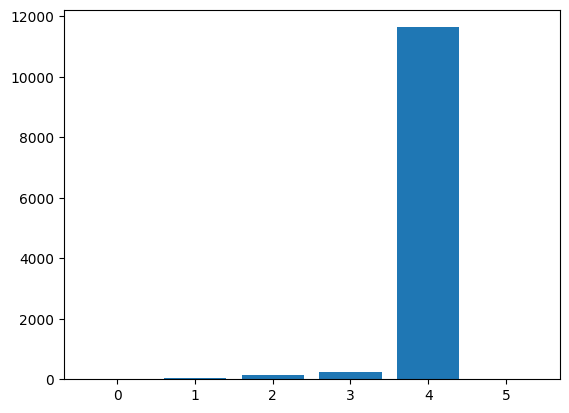

In [4]:

edge_types = data.es["nkind"]

# OPTION A: use sets to get unique types
unique_edge_types = set(edge_types)
print("Types of unique edges (option A):", unique_edge_types)

# OPTION B: use numpy to get unique types and counts
unique, counts = np.unique(edge_types, return_counts=True)
for i, n in zip(unique, counts):
    print(f"Type of edge: {i}, Count: {n}")
    
plt.bar(unique, counts)
plt.show()

    

# 3) MEAN DIAMETER FOR EACH NKIND

['diameters', 'htt', 'nkind', 'lengths', 'diameter', 'connectivity', 'length', 'points', 'lengths2']
[array([5.52154171e-06, 5.52154171e-06, 5.52154171e-06]), array([3.14983642e-06, 3.14983642e-06, 3.14983642e-06])]
[np.float64(5.5215417147e-06), np.float64(3.1498364209999998e-06)]
OPTION A: nkind = 0: average diameter = 2.015844e-05
OPTION A: nkind = 1: average diameter = 2.909457e-05
OPTION A: nkind = 2: average diameter = 6.884343e-06
OPTION A: nkind = 3: average diameter = 7.746774e-06
OPTION A: nkind = 4: average diameter = 3.990220e-06
OPTION A: nkind = 5: average diameter = 8.300136e-06
OPTION B: nkind = 0: average diameter (att) = 2.018907e-05
OPTION B: nkind = 1: average diameter (att) = 2.936807e-05
OPTION B: nkind = 2: average diameter (att) = 6.921574e-06
OPTION B: nkind = 3: average diameter (att) = 7.782175e-06
OPTION B: nkind = 4: average diameter (att) = 3.994613e-06
OPTION B: nkind = 5: average diameter (att) = 9.055386e-06


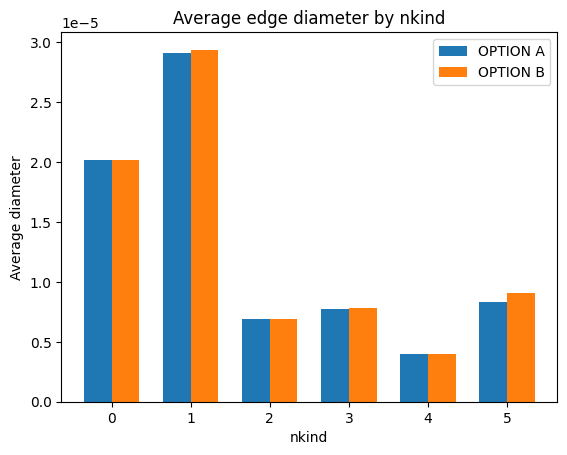

Error promedio: 2.84e-08


In [5]:
import numpy as np
import matplotlib.pyplot as plt


print(data.es.attributes())
print(data.es["diameters"][:2])  # first edge diameters (array of 3 values)
print(data.es["diameter"][:2])   # first 2 edge diameters (mean value)

# OPTION A: use diameters array and compute mean for each edge
diam_edge = np.array([np.mean(d) for d in data.es["diameters"]])

# classify by nkind
nkind = np.array(data.es["nkind"])

for k in np.unique(nkind):
    mean_d = diam_edge[nkind == k].mean()
    print(f"OPTION A: nkind = {k}: average diameter = {mean_d:.6e}")

# OPTION B: use diameter attribute directly
diam_edge_att = np.array(data.es["diameter"])
for k in np.unique(nkind):
    mean_d = diam_edge_att[nkind == k].mean()
    print(f"OPTION B: nkind = {k}: average diameter (att) = {mean_d:.6e}")

# --- Plot ---
unique_k = np.unique(nkind)
mean_a = [diam_edge[nkind == k].mean() for k in unique_k]
mean_b = [diam_edge_att[nkind == k].mean() for k in unique_k]

x = np.arange(len(unique_k))
width = 0.35

plt.bar(x - width/2, mean_a, width, label='OPTION A')
plt.bar(x + width/2, mean_b, width, label='OPTION B')

plt.xticks(x, unique_k)
plt.xlabel("nkind")
plt.ylabel("Average diameter")
plt.title("Average edge diameter by nkind")
plt.legend()
plt.show()

# Error
mean_error = np.mean(np.abs(diam_edge - diam_edge_att))
print(f"Error promedio: {mean_error:.2e}")


# 4) Average length for each vessel type

[array([8.54822138e-06, 8.54822138e-06, 8.54822138e-06]), array([6.28825577e-06, 6.28825577e-06, 6.28825577e-06])]
[np.float64(2.5644664139996576e-05), np.float64(1.886476730802158e-05)]
OPTION A: nkind = 0: average length = 1.763233e-04
OPTION A: nkind = 1: average length = 7.762322e-05
OPTION A: nkind = 2: average length = 8.145240e-05
OPTION A: nkind = 3: average length = 4.699330e-05
OPTION A: nkind = 4: average length = 6.841229e-05
OPTION A: nkind = 5: average length = 7.974691e-06
OPTION B: nkind = 0: average length (att) = 1.763233e-04
OPTION B: nkind = 1: average length (att) = 7.762322e-05
OPTION B: nkind = 2: average length (att) = 8.145240e-05
OPTION B: nkind = 3: average length (att) = 4.699330e-05
OPTION B: nkind = 4: average length (att) = 6.841650e-05
OPTION B: nkind = 5: average length (att) = 7.974691e-06


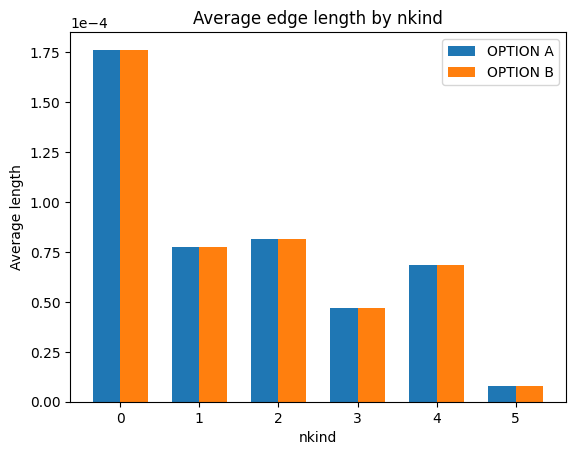

Error in lenghts: 4.05e-09


In [6]:
import numpy as np
import matplotlib.pyplot as plt


print(data.es["lengths"][:2])  # first length arrays (3 numbers per edge)
print(data.es["length"][:2])   # first 2 mean lengths

# OPTION A: use lengths array and compute total length for each edge
lengths_edges = np.array([np.sum(l) for l in data.es["lengths"]])

# classify by nkind
nkind = np.array(data.es["nkind"])

for k in np.unique(nkind):
    mean_l = lengths_edges[nkind == k].mean()
    print(f"OPTION A: nkind = {k}: average length = {mean_l:.6e}")

# OPTION B: use length attribute directly
lengths_att = np.array(data.es["length"])
for k in np.unique(nkind):
    mean_l = lengths_att[nkind == k].mean()
    print(f"OPTION B: nkind = {k}: average length (att) = {mean_l:.6e}")

# Plot
unique_k = np.unique(nkind)
mean_a = [lengths_edges[nkind == k].mean() for k in unique_k]
mean_b = [lengths_att[nkind == k].mean() for k in unique_k]

x = np.arange(len(unique_k))
width = 0.35

plt.bar(x - width/2, mean_a, width, label='OPTION A')
plt.bar(x + width/2, mean_b, width, label='OPTION B')

# To show in scientific notation
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.xticks(x, unique_k)
plt.xlabel("nkind")
plt.ylabel("Average length")
plt.title("Average edge length by nkind")
plt.legend()
plt.show()

# Mean error
mean_error_length = np.mean(np.abs(lengths_edges - lengths_att))
print(f"Error in lenghts: {mean_error_length:.2e}")


# 5) Degrees of the nodes? Are there nodes with degree > 3?

Degrees of nodes: [1 2 3 4]
Node 0 has degree 4
Node 28 has degree 4
Node 42 has degree 4
Node 48 has degree 4
Node 49 has degree 4
Node 51 has degree 4
Node 58 has degree 4
Node 59 has degree 4
Node 65 has degree 4
Node 68 has degree 4
Node 73 has degree 4
Node 76 has degree 4
Node 77 has degree 4
Node 82 has degree 4
Node 83 has degree 4
Node 102 has degree 4
Node 107 has degree 4
Node 124 has degree 4
Node 129 has degree 4
Node 148 has degree 4
Node 149 has degree 4
Node 151 has degree 4
Node 155 has degree 4
Node 194 has degree 4
Node 197 has degree 4
Node 201 has degree 4
Node 209 has degree 4
Node 214 has degree 4
Node 237 has degree 4
Node 246 has degree 4
Node 253 has degree 4
Node 287 has degree 4
Node 306 has degree 4
Node 307 has degree 4
Node 332 has degree 4
Node 336 has degree 4
Node 345 has degree 4
Node 354 has degree 4
Node 357 has degree 4
Node 367 has degree 4
Node 374 has degree 4
Node 377 has degree 4
Node 407 has degree 4
Node 415 has degree 4
Node 417 has degree 

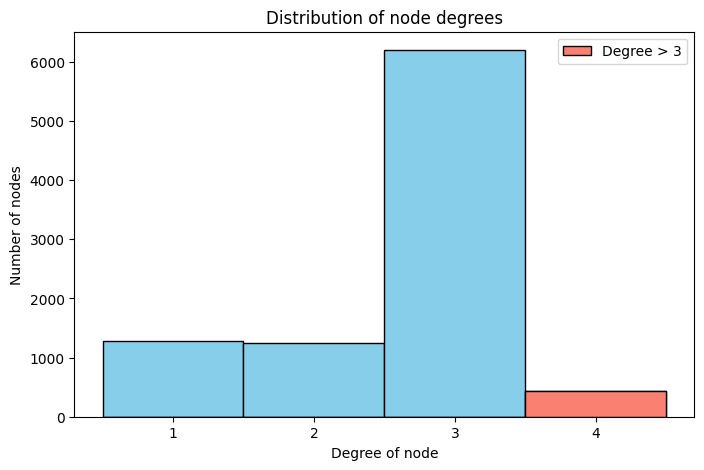

In [7]:
degrees = np.array(data.degree())
print("Degrees of nodes:", np.unique(degrees))

count = 0
for i, d in enumerate(degrees):
    if d > 3:
        print(f"Node {i} has degree {d}")
        count += 1
       
print(count)


# Histogram of degrees
plt.figure(figsize=(8,5))
plt.hist(degrees, bins=np.arange(degrees.min(), degrees.max()+2)-0.5, color='skyblue', edgecolor='k')
plt.xlabel("Degree of node")
plt.ylabel("Number of nodes")
plt.title("Distribution of node degrees")

# Nodes with degree > 3 highlighted in another color
plt.hist(degrees[degrees > 3], bins=np.arange(degrees.min(), degrees.max()+2)-0.5, 
         color='salmon', edgecolor='k', label='Degree > 3')

plt.legend()
plt.xticks(np.arange(degrees.min(), degrees.max()+1))
plt.show()

# 6) Nodes with boundary conditions compared to the total number of nodes and location

In [8]:
print(data.vs.attributes()) # we have border vertices, boundary type and boundary value to check BCs
print(data.vs["border_vertices"][:10])  # first 10 entries
print(data.vs["boundaryType"][:10])  # first 10 entries

# OPTION A: check by frontier nodes (always will have a BC if frontier)
frontier_nodes = np.array([fn is not None for fn in data.vs["border_vertices"]])

# OPTION B: check by boundaryType
# booleano de nodos con boundaryType definido (no None)
has_boundary = np.array([bt is not None for bt in data.vs["boundaryType"]])

# OPTION C: check by boundaryValue

# no need to check compliance of both (with 1 is sufficient)
node_with_bc = frontier_nodes & has_boundary

print(f"Nodes with BC: {np.sum(node_with_bc)} of {len(data.vs)}")
# location in the array
print(f"Location of nodes with BC: {np.where(node_with_bc)[0]}")
# get coordinates of these nodes
coords_with_bc = np.array(data.vs["coords"])[node_with_bc]
print("Coordinates of nodes with BC:", coords_with_bc[:5])

coords_all = np.array(data.vs["coords"])

['index', 'coords', 'pBC', 'pressure', 'border_vertices', 'boundaryType', 'boundaryValue']
[None, None, None, None, 1, None, None, None, None, None]
[None, None, None, None, 1, None, None, None, None, None]
Nodes with BC: 1275 of 9168
Location of nodes with BC: [   4   93  103 ... 9165 9166 9167]
Coordinates of nodes with BC: [[ 1.87309433e-03  1.56175702e-03 -6.12222222e-05]
 [ 1.75309433e-03  2.28675702e-03 -3.62222222e-05]
 [ 8.66094333e-04  1.62975702e-03 -3.42222222e-05]
 [ 1.30409433e-03  2.24675702e-03 -2.92222222e-05]
 [ 8.23094333e-04  1.74675702e-03 -2.62222222e-05]]


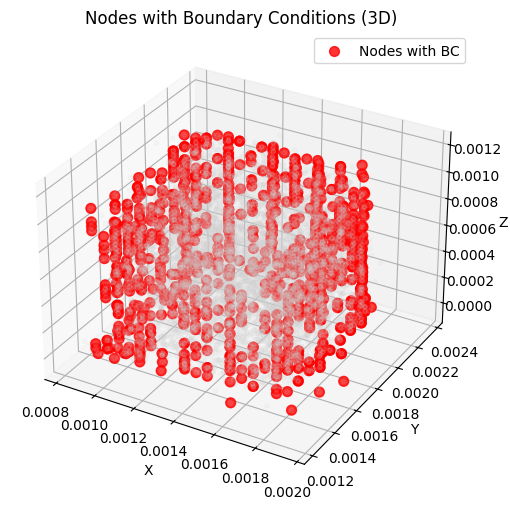

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# All nodes in light gray
ax.scatter(coords_all[:,0], coords_all[:,1], coords_all[:,2], color='lightgray', s=10, alpha=0.1)

# Nodes BC in red
ax.scatter(coords_with_bc[:,0], coords_with_bc[:,1], coords_with_bc[:,2], color='red', s=50, alpha=0.8, label='Nodes with BC')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Nodes with Boundary Conditions (3D)")
ax.legend()
plt.show()


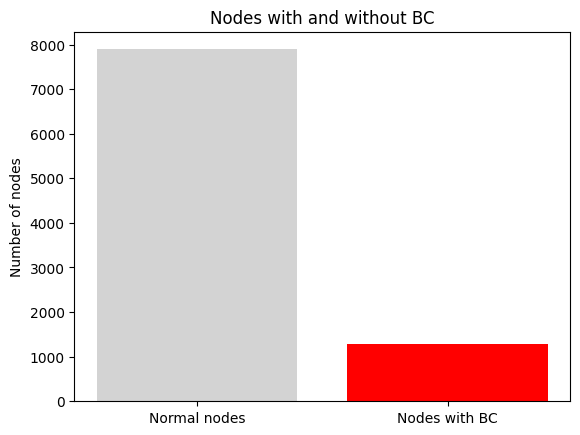

In [10]:
import numpy as np

count_bc = np.sum(node_with_bc)
count_all = len(node_with_bc)

plt.bar(['Normal nodes','Nodes with BC'], [count_all - count_bc, count_bc], color=['lightgray','red'])
plt.ylabel('Number of nodes')
plt.title('Nodes with and without BC')
plt.show()
